In [2]:
import pandas as pd
import pyarrow.parquet as pq
import re
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [3]:
mount_path = "/workspaces/prediction_house_price_from_airbnb/Data"

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_parquet(mount_path + "/silver/listings.parquet")



In [8]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance
count,2.830100e+04,2.830100e+04,2.830100e+04,28298.000000,28298.000000,0.0,28301.000000,28301.000000,28301.000000,28234.000000,27014.000000,28079.000000,28301.000000,28301.000000,28301.000000,28301.000000,28301.000000,28301.000000,28301.000000,28301.000000,28301.000000,0.0,28301.000000,28301.000000,28301.000000,28301.000000,28301.000000,28301.000000,28301.000000,19783.000000,19601.000000,19602.000000,19602.000000,19601.000000,19600.000000,19601.000000,0.0,28301.000000,28301.000000,28301.000000,28301.000000,19783.000000,28301.000000
mean,2.226960e+17,2.022123e+13,1.457719e+08,19.797901,30.847410,NaN,-22.967609,-43.250871,4.114024,1.616349,1.677130,2.557071,1448.447369,4.904138,528.441751,4.543550,5.711565,629.325784,671.281333,4.821109,657.905876,NaN,14.453270,31.777852,53.365853,207.147168,17.502420,6.156673,0.398466,4.730644,4.802830,4.721006,4.880358,4.863260,4.869042,4.689421,NaN,9.448677,8.675029,0.680718,0.081517,0.894104,11.047906
std,3.274209e+17,0.000000e+00,1.530791e+08,105.382449,142.808883,NaN,0.034977,0.099639,2.382022,1.017865,1.005444,2.151025,9631.935666,24.675970,551.920258,21.298064,25.031511,566.884637,558.971637,21.472801,558.121162,NaN,11.458966,21.865186,31.350048,136.190680,37.786946,10.662293,0.930661,0.616910,0.412908,0.472404,0.339916,0.366485,0.323033,0.455952,NaN,27.668056,27.675389,1.736604,0.684171,1.026587,8.469120
min,1.787800e+04,2.022123e+13,3.607000e+03,1.000000,1.000000,NaN,-23.072840,-43.705910,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,0.038052
25%,1.583170e+07,2.022123e+13,1.745770e+07,1.000000,1.000000,NaN,-22.984820,-43.309340,2.000000,1.000000,1.000000,1.000000,317.000000,1.000000,45.000000,1.000000,2.000000,90.000000,90.000000,2.000000,90.000000,NaN,2.000000,10.000000,28.000000,76.000000,0.000000,0.000000,0.000000,4.710000,4.780000,4.640000,4.890000,4.870000,4.870000,4.600000,NaN,1.000000,1.000000,0.000000,0.000000,0.190000,6.460272
50%,4.432035e+07,2.022123e+13,7.844898e+07,2.000000,3.000000,NaN,-22.972995,-43.196190,4.000000,1.000000,1.000000,2.000000,600.000000,2.000000,365.000000,2.000000,3.000000,365.000000,1125.000000,2.300000,999.000000,NaN,14.000000,34.000000,60.000000,223.000000,3.000000,1.000000,0.000000,4.910000,4.940000,4.880000,5.000000,5.000000,5.000000,4.800000,NaN,2.000000,1.000000,0.000000,0.000000,0.540000,8.156390
75%,6.340560e+17,2.022123e+13,2.447420e+08,5.000000,7.000000,NaN,-22.956210,-43.186255,5.000000,2.000000,2.000000,3.000000,1071.000000,4.000000,1125.000000,3.000000,5.000000,1125.000000,1125.000000,4.000000,1125.000000,NaN,26.000000,53.000000,83.000000,350.000000,16.000000,7.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,3.000000,1.000000,0.000000,1.240000,15.707076
max,7.915838e+17,2.022123e+13,4.930385e+08,1821.000000,1849.000000,NaN,-22.749690,-43.104400,16.000000,20.000000,30.000000,91.000000,604981.000000,1125.000000,47036.000000,1125.000000,

In [9]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
df = df[(df['price'] >= q1 - 1.5*iqr) & (df['price'] <= q3 + 1.5*iqr)]

array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

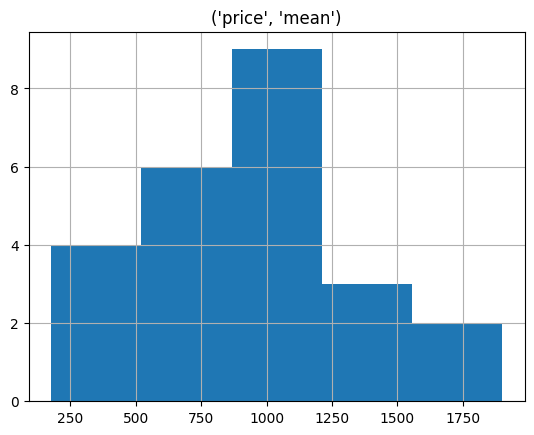

In [10]:
df.groupby('bathrooms').agg({'price':['mean']}).hist(bins=5)

array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

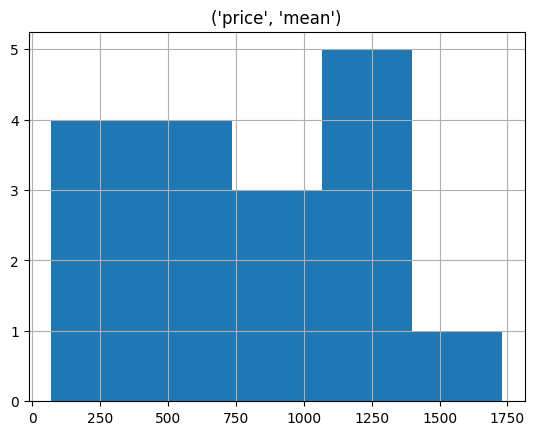

In [11]:
df.groupby('bedrooms').agg({'price':['mean']}).hist(bins=5)

array([[<Axes: title={'center': "('price', 'mean')"}>]], dtype=object)

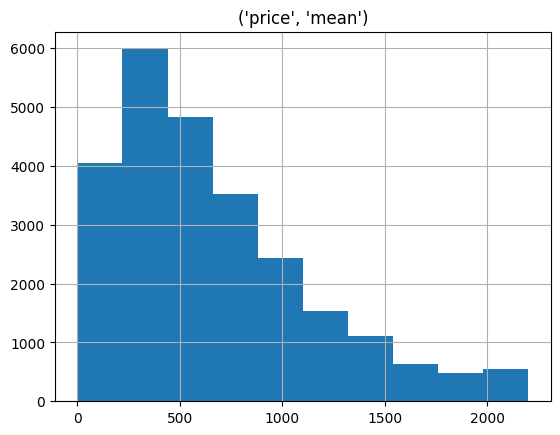

In [12]:
df.groupby('distance').agg({'price':['mean']}).hist(bins=10)

array([[<Axes: title={'center': "('distance', 'mean')"}>]], dtype=object)

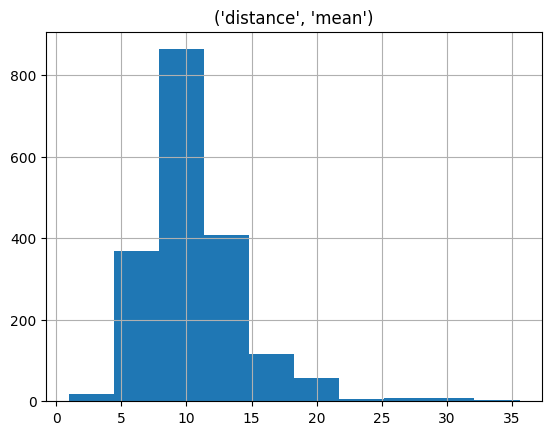

In [13]:
df.groupby('price').agg({'distance':['mean']}).hist(bins=10)

In [14]:
df_corr=df.select_dtypes(include=['float64', 'int64'])

In [15]:
df_corr = df.loc[:, ['price',
                     'accommodates',
                     'bathrooms',
                     'bedrooms',
                     'beds',
                     'availability_30',
                     'availability_60',
                     'availability_90',
                     'availability_365',
                     'number_of_reviews',
                     'review_scores_rating',
                     'review_scores_accuracy',
                     'review_scores_cleanliness',
                     'review_scores_cleanliness',
                     'review_scores_checkin',
                     'review_scores_communication',
                     'review_scores_location',
                     'review_scores_value',
                     'distance'
                    ]]

In [16]:
df_corr.corr()

,price,accommodates,bathrooms,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,distance
price,1.000000,0.423780,0.360875,0.408450,0.254937,0.107073,0.124417,0.119218,0.046003,-0.018338,0.003633,-0.002804,-0.011829,-0.011829,-0.020055,-0.018138,0.077521,-0.063120,0.048956
accommodates,0.423780,1.000000,0.518605,0.647398,0.678312,0.011605,0.024240,0.029765,0.044252,-0.004059,-0.006317,-0.029737,-0.051418,-0.051418,-0.008647,-0.000859,-0.005191,-0.024447,0.129546
bathrooms,0.360875,0.518605,1.000000,0.672770,0.472667,0.051953,0.050327,0.047577,0.044924,-0.064182,-0.006102,-0.002352,-0.016509,-0.016509,0.001503,0.003631,0.000916,-0.011547,0.150239
bedrooms,0.408450,0.647398,0.672770,1.000000,0.567838,0.037441,0.034520,0.034219,0.041318,-0.051203,-0.012773,-0.020547,-0.034253,-0.034253,-0.009919,-0.005102,-0.003714,-0.028824,0.150556
beds,0.254937,0.678312,0.472667,0.567838,1.000000,0.026759,0.030859,0.035245,0.040177,-0.003046,-0.020170,-0.033487,-0.044944,-0.044944,-0.021935,-0.012349,-0.011998,-0.022184,0.090955
availability_30,0.107073,0.011605,0.051953,0.037441,0.026759,1.000000,0.936001,0.862402,0.483888,-0.255661,-0.096446,-0.090804,-0.064326,-0.064326,-0.062915,-0.064784,-0.102711,-0.087648,0.156583
availability_60,0.124417,0.024240,0.050327,0.034520,0.030859,0.936001,1.000000,0.953559,0.526071,-0.225204,-0.091585,-0.088008,-0.061153,-0.061153,-0.057863,-0.060155,-0.096027,-0.079833,0.195018
availability_90,0.119218,0.029765,0.047577,0.034219,0.035245,0.862402,0.953559,1.000000,0.585936,-0.190319,-0.075315,-0.076659,-0.052258,-0.052258,-0.049279,-0.050898,-0.082457,-0.065748,0.178174
availability_365,0.046003,0.044252,0.044924,0.041318,0.040177,0.483888,0.526071,0.585936,1.000000,-0.135049,-0.054176,-0.063226,-0.043031,-0.043031,-0.044492,-0.043722,-0.069864,-0.049990,0.113356
number_of_reviews,-0.018338,-0.004059,-0.064182,-0.051203,-0.003046,-0.255661,-0.225204,-0.190319,-0.135049,1.000000,0.068034,0.065856,0.053233,0.053233,0.047251,0.044478,0.055184,0.068854,-0.081264


In [ ]:
sns.heatmap(df_corr, annot=True)
plt.show()